<a href="https://colab.research.google.com/github/rocx320/MachineLearning/blob/main/2247226_ML_LAB7_WineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# Load the wine dataset
wine_data = load_wine()

# Convert the data into a DataFrame
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Add the target column to the DataFrame
wine_df['target'] = wine_data.target

# Split the dataset into features (X) and target (y)
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for poly kernel
    'gamma': ['scale', 'auto', 0.1, 1],  # Only for poly and rbf kernels
}

# Initialize SVM classifier
svm_model = SVC()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print()

# Evaluate on test set using best model from GridSearchCV
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best model from GridSearchCV: {accuracy:.2f}')

# Define parameter distributions for RandomizedSearchCV
param_distributions = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only for poly kernel
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 6)),  # Only for poly and rbf kernels
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distributions, n_iter=20, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

print("Best parameters found:")
print(random_search.best_params_)
print()

# Evaluate on test set using best model from RandomizedSearchCV
best_svm_model_random = random_search.best_estimator_
y_pred_random = best_svm_model_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Accuracy with best model from RandomizedSearchCV: {accuracy_random:.2f}')


Best parameters found:
{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

Accuracy with best model from GridSearchCV: 1.00
Best parameters found:
{'kernel': 'linear', 'gamma': 'scale', 'degree': 4, 'C': 100.0}

Accuracy with best model from RandomizedSearchCV: 0.97


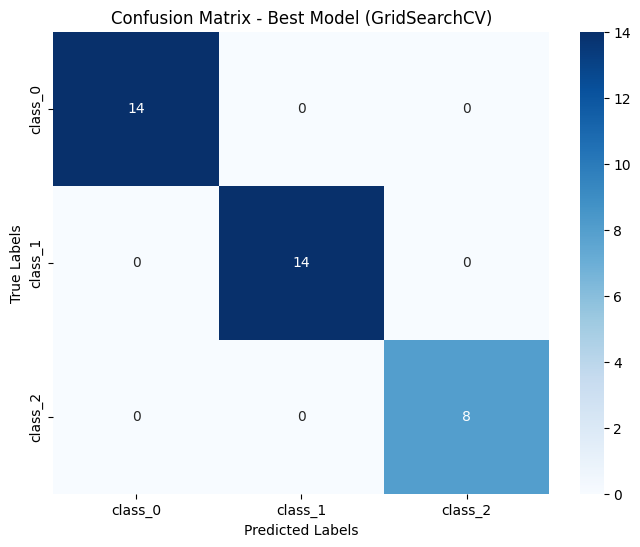

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ... Rest of the code ...

# Get predictions from the best model
y_pred_best = best_svm_model.predict(X_test_scaled)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title("Confusion Matrix - Best Model (GridSearchCV)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


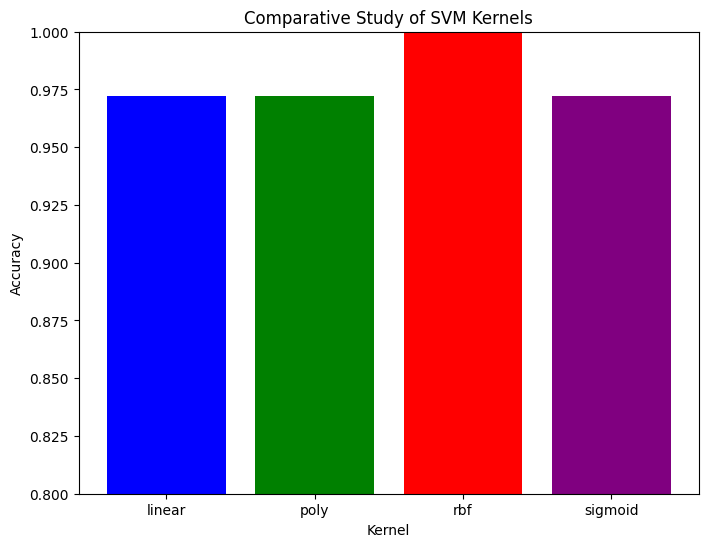

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
wine_data = load_wine()
X = wine_data.data
y = wine_data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create a bar plot to compare accuracies
plt.figure(figsize=(8, 6))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Comparative Study of SVM Kernels')
plt.ylim(0.8, 1.0)  # Set y-axis limits
plt.show()
